The competition datasets conatin about 10,000 tweets from twitter. Twitter has always been an important communication portal for people all over the world. People use twitter to talk about real-world incidents/accidents they’re observing in real-time. We, humans may can easily decide whether a person is tweeting about real disaster or not. But a machine needs some sophisticated model and cleaned data to do that. In this notebook I will try to build a model which will analyze the datasets provided and give verdict if the tweet is depicting a real disaster (1) or not (0). So let's get started.

***Importing Usual Libraries***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

***Loading Datasets***

In [2]:
df_train= pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

***First Look At Data***

In [3]:
print('The shape of train dataset: ', df_train.shape)
print('The shape of test dataset: ', df_test.shape)

The shape of train dataset:  (7613, 5)
The shape of test dataset:  (3263, 4)


In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
df_train.sample(n=10, replace=False, random_state=1) # We will look at 10 random samples

,id,keyword,location,text,target
3228,4632,emergency%20services,"Sydney, New South Wales",Goulburn man Henry Van Bilsen missing: Emergen...,1
3706,5271,fear,NaN,The things we fear most in organizations--fluc...,0
6957,9982,tsunami,Land Of The Kings,@tsunami_esh ?? hey Esh,0
2887,4149,drown,NaN,@POTUS you until you drown by water entering t...,0
7464,10680,wounds,"cody, austin follows ?*?",Crawling in my skin\nThese wounds they will no...,1
2539,3643,desolation,Istanbul,#np agalloch - the desolation song,0
6837,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
7386,10570,windstorm,Houston,New roof and hardy up..Windstorm inspection to...,0
1506,2174,catastrophic,Inexpressible Island,The Catastrophic Effects of Hiroshima and Naga...,1
1875,2694,crush,Everywhere,tiffanyfrizzell has a crush: http://t.co/RaF73...,0


***Checking Missing Values***

In [7]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Data Exploration & Visualization

Let's do some exploration and visualization of the data. This will help us to gain some valuable insights about the dataset.

***Checking if the dataset is well balanced***

([<matplotlib.axis.XTick at 0x10ba6b668>,
 <a list of 2 Text xticklabel objects>)

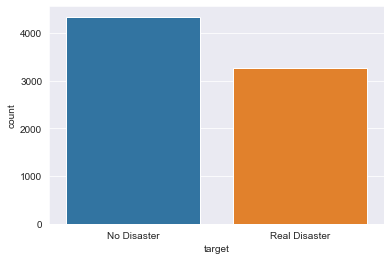

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='target', data= df_train)
Labels= ('No Disaster', 'Real Disaster')
plt.xticks(range(2), Labels)

Yes, it is balanced. And we can also understand that tweets about disaster are less than those about no disaster.Let's see the top 5 frequent disastrous keywords:

In [10]:
df_train[df_train['target']== 1]['keyword'].value_counts().head()

outbreak       39
wreckage       39
derailment     39
oil%20spill    37
typhoon        37
Name: keyword, dtype: int64

In [11]:
df_train['text_length']= df_train['text'].apply(len)
df_train.sample(n=5, replace=False, random_state=1)

,id,keyword,location,text,target,text_length
3228,4632,emergency%20services,"Sydney, New South Wales",Goulburn man Henry Van Bilsen missing: Emergen...,1,141
3706,5271,fear,NaN,The things we fear most in organizations--fluc...,0,138
6957,9982,tsunami,Land Of The Kings,@tsunami_esh ?? hey Esh,0,23
2887,4149,drown,NaN,@POTUS you until you drown by water entering t...,0,140
7464,10680,wounds,"cody, austin follows ?*?",Crawling in my skin\nThese wounds they will no...,1,50


Let's see if the length of the tweets have any relation with the disaster. People tend to express their thoughts in the limited space of a tweet. But disasters affect people in maybe shocking ways, when they may want to avoid giving extra informations or want to be careful with the tweet length. So they might use lesser words to express their thoughts! 

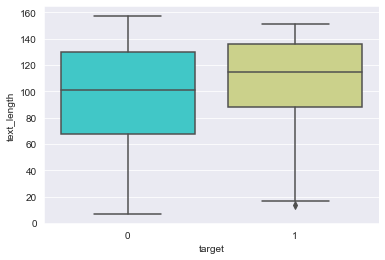

In [12]:
sns.boxplot(x= 'target', y= 'text_length', data= df_train, palette= 'rainbow')

Well, almost got what I expected. Tweets not related to disasters are more dense around 70 to 130 while disastrous tweets have density from 90 and spanned to almost 140 words. But in general the text length range is shorter in the later case. Let's check the correlation between them.

In [13]:
correlation= df_train['target'].corr(df_train['text_length'])
correlation

0.18181684254460737

Text(0.5, 1.0, 'Test Set')

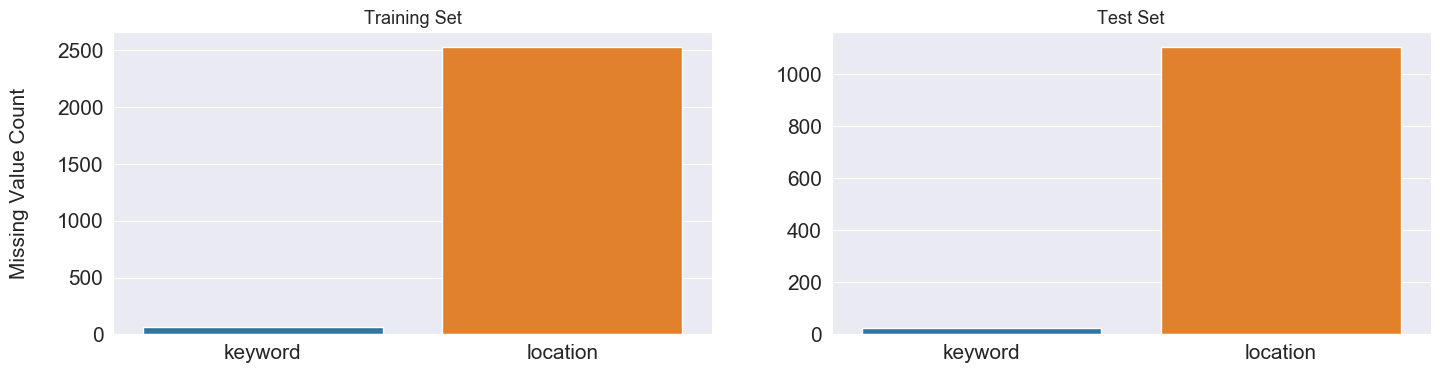

In [14]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=df_train[missing_cols].isnull().sum().index, y=df_train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=df_test[missing_cols].isnull().sum().index, y=df_test[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

From above visualization we can say, there is 18% correlation between them, it should have a little effect in predicting. And 0.8% of keyword is missing in both training and test set 33% of location is missing in both training and test set.

## Cleaning The Dataset

Let's define a function to clean the text data. I will remove all the stopwords that does not contribute in the model to make the classification. I will also take only the stems of the words.  

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muniahumaira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def cleaned_tweet(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    tweets = re.sub("[^a-zA-Z]", ' ', text)
    tweets = tweets.lower()
    tweets = tweets.split()
    ps = PorterStemmer()
    tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('english'))]
    tweets = ' '.join(tweets)
    return tweets


In [17]:
df_train['clean_tweet'] = df_train['text'].apply(cleaned_tweet)
df_test['clean_tweet'] = df_test['text'].apply(cleaned_tweet)

***Creating the Bag of Words model***

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features = 1500)
X_train_vector= cv.fit_transform(df_train['clean_tweet'])
y_train= df_train.iloc[:, 4].values

'''note that I'm NOT using .fit_transform() here. Using just .transform() makes sure
 that the tokens in the train vectors are the only ones mapped to the test vectors -
 i.e. that the train and test vectors use the same set of tokens.'''

X_test_vector= cv.transform(df_test['clean_tweet'])

In [19]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

Let's test the model and see how well it performs on the train data. For this I need to use cross-validation; where the model will be trained on a portion of the known data and validated with the rest. If this is done several times with different portions (in this case 5 times), it is possible to get a good idea for how a particular model or method performs.

The metric for this competition is F1, so let's use that here:

In [20]:
from sklearn import model_selection
scores= model_selection.cross_val_score(classifier, X_train_vector, df_train['target'], cv=5, scoring="f1")
scores

array([0.60472973, 0.61993127, 0.66942149, 0.62741935, 0.74246575])

***Fitting The data***

In [21]:
# Fitting to the train set
classifier.fit(X_train_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

***Predicting the Test set results***

In [22]:
y_pred = classifier.predict(X_test_vector)

In [25]:
Result= pd.DataFrame()
Result['id']= df_test['id']
Result['target']= y_pred
Result.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
